In [2]:
import psycopg2
import pandas as pd
from sklearn.cross_validation import train_test_split

def load_labels():
    db = psycopg2.connect(database='martinrasumoff')
    cursor = db.cursor()

    #Loading Labels
    cursor.execute("select * from labels_water_pumps;")
    list_labels = cursor.fetchall()

    series_labels = pd.DataFrame(list_labels)

    return series_labels

df_labels = load_labels()

df_labels.columns = ['id','label']

print df_labels['label'].unique()

print df_labels.head()
print df_labels.tail()

['functional' 'non functional' 'functional needs repair']
      id           label
0  69572      functional
1   8776      functional
2  34310      functional
3  67743  non functional
4  19728      functional
          id       label
59395  60739  functional
59396  27263  functional
59397  37057  functional
59398  31282  functional
59399  26348  functional


In [3]:

def load_wells():
    db = psycopg2.connect(database='martinrasumoff')
    cursor = db.cursor()

    #Loading Pump Data
    cursor.execute("select * from water_pumps;")
    list_pumps = cursor.fetchall()

    #Converting wells data into a pandas Data Frame
    df_pumps = pd.DataFrame(list_pumps)

    return df_pumps

df_data = load_wells()

df_data.columns = ['id','amount_tsh',
                    'date_recorded',
                    'funder',
                    'gps_height',
                    'installer',
                    'longitude',
                    'latitude',
                    'wpt_name',
                    'num_private',
                    'basin',
                    'subvillage',
                    'region',
                    'region_code',
                    'district_code',
                    'lga',
                    'ward',
                    'population',
                    'public_meeting',
                    'recorded_by',
                    'scheme_management',
                    'scheme_name',
                    'permit',
                    'construction_year',
                    'extraction_type',
                    'extraction_type_group',
                    'extraction_type_class',
                    'management',
                    'management_group',
                    'payment',
                    'payment_type',
                    'water_quality',
                    'quality_group',
                    'quantity',
                    'quantity_group',
                    'source',
                    'source_type',
                    'source_class',
                    'waterpoint_type',
                    'waterpoint_type_group']

print df_data.head()
print df_data.tail()

      id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572        6000    2011-03-14         Roman        1390         Roman   
1   8776           0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310          25    2013-02-25  Lottery Club         686  World vision   
3  67743           0    2013-01-28        Unicef         263        UNICEF   
4  19728           0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name num_private  \
0  34.938093  -9.856322                  none           0   
1  34.698766  -2.147466              Zahanati           0   
2  37.460664  -3.821329           Kwa Mahundi           0   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu           0   
4  31.130847  -1.825359               Shuleni           0   

           ...          payment_type water_quality quality_group  \
0          ...              annually          soft          good   
1          ...             n

In [4]:
df_labels = load_labels()

df_labels.columns = ['id','label']

print df_labels.head()
print df_labels.tail()

      id           label
0  69572      functional
1   8776      functional
2  34310      functional
3  67743  non functional
4  19728      functional
          id       label
59395  60739  functional
59396  27263  functional
59397  37057  functional
59398  31282  functional
59399  26348  functional


In [5]:
df_labels = df_labels.sort(['id'])

print df_labels.head()
print df_labels.tail()

       id           label
9410    0  non functional
18428   1      functional
12119   2      functional
10629   3      functional
2343    4  non functional
          id           label
15137  74240      functional
8667   74242      functional
22584  74243  non functional
108    74246  non functional
39131  74247  non functional


In [6]:
print df_data.head()

      id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572        6000    2011-03-14         Roman        1390         Roman   
1   8776           0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310          25    2013-02-25  Lottery Club         686  World vision   
3  67743           0    2013-01-28        Unicef         263        UNICEF   
4  19728           0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name num_private  \
0  34.938093  -9.856322                  none           0   
1  34.698766  -2.147466              Zahanati           0   
2  37.460664  -3.821329           Kwa Mahundi           0   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu           0   
4  31.130847  -1.825359               Shuleni           0   

           ...          payment_type water_quality quality_group  \
0          ...              annually          soft          good   
1          ...             n

In [7]:
df_data = df_data.sort(['id'])

print df_data.head()
print df_data.tail()

       id  amount_tsh date_recorded           funder  gps_height installer  \
9425    0           0    2012-11-13            Tasaf           0     TASAF   
18440   1           0    2011-03-05            Shipo        1978     SHIPO   
12134   2           0    2011-03-27             Lvia           0      LVIA   
10644   3          10    2013-06-03  Germany Republi        1639       CES   
2350    4           0    2011-03-22             Cmsr           0      CMSR   

       longitude  latitude        wpt_name num_private          ...           \
9425   33.125828 -5.118154         Mratibu           0          ...            
18440  34.770717 -9.395642            none           0          ...            
12134  36.115056 -6.279268         Bombani           0          ...            
10644  37.147432 -3.187555  Area 7 Namba 5           0          ...            
2350   36.164893 -6.099289         Ezeleda           0          ...            

      payment_type water_quality quality_group    

In [8]:

df_complete = pd.concat([df_labels,df_data],axis=1)

print df_complete.head()
print df_complete.shape

      id           label     id  amount_tsh date_recorded        funder  \
0  69572      functional  69572        6000    2011-03-14         Roman   
1   8776      functional   8776           0    2013-03-06       Grumeti   
2  34310      functional  34310          25    2013-02-25  Lottery Club   
3  67743  non functional  67743           0    2013-01-28        Unicef   
4  19728      functional  19728           0    2011-07-13   Action In A   

   gps_height     installer  longitude   latitude          ...            \
0        1390         Roman  34.938093  -9.856322          ...             
1        1399       GRUMETI  34.698766  -2.147466          ...             
2         686  World vision  37.460664  -3.821329          ...             
3         263        UNICEF  38.486161 -11.155298          ...             
4           0       Artisan  31.130847  -1.825359          ...             

  payment_type water_quality quality_group      quantity quantity_group  \
0     annually   

In [37]:
def code_df(df):
    a = df.basin.unique()
    df.basin.replace(a,(1,2,3,4,5,6,7,8,9),inplace=True)

    b = df.scheme_management.unique()
    df.scheme_management.replace(b,range(len(b)),inplace=True)

    c = df.extraction_type_class.unique()
    df.extraction_type_class.replace(c,range(len(c)),inplace=True)

    d = df.management_group.unique()
    df.management_group.replace(d,range(len(d)),inplace=True)

    e = df.payment.unique()
    df.payment.replace(e,range(len(e)),inplace=True)

    f = df.water_quality.unique()
    df.water_quality.replace(f,range(len(f)),inplace=True)

    g = df.quantity.unique()
    df.quantity.replace(g,range(len(g)),inplace=True)

    h = df.source.unique()
    df.source.replace(h,range(len(h)),inplace=True)

    i = df.source_class.unique()
    df.source_class.replace(i,range(len(i)),inplace=True)

    j = df.waterpoint_type.unique()
    df.waterpoint_type.replace(j,range(len(j)),inplace=True)

    return df

df_coded = code_df(df_complete)
print df_coded.head()
print df_coded.tail()

print df_coded.shape

      id  label     id  amount_tsh date_recorded        funder  gps_height  \
0  69572      1  69572        6000    2011-03-14         Roman        1390   
1   8776      1   8776           0    2013-03-06       Grumeti        1399   
2  34310      1  34310          25    2013-02-25  Lottery Club         686   
3  67743      2  67743           0    2013-01-28        Unicef         263   
4  19728      1  19728           0    2011-07-13   Action In A           0   

      installer  longitude   latitude          ...           payment_type  \
0         Roman  34.938093  -9.856322          ...               annually   
1       GRUMETI  34.698766  -2.147466          ...              never pay   
2  World vision  37.460664  -3.821329          ...             per bucket   
3        UNICEF  38.486161 -11.155298          ...              never pay   
4       Artisan  31.130847  -1.825359          ...              never pay   

  water_quality  quality_group quantity quantity_group  source  \
0 

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels

%matplotlib inline

In [10]:
import numpy as np
import matplotlib.pyplot as plt

df_labels_2 = load_labels()
df_labels_2.columns = ['id','label']
df_labels_2 = df_labels_2.sort(['id'])

df_data_2 = load_wells()

df_data_2.columns = ['id','amount_tsh',
                    'date_recorded',
                    'funder',
                    'gps_height',
                    'installer',
                    'longitude',
                    'latitude',
                    'wpt_name',
                    'num_private',
                    'basin',
                    'subvillage',
                    'region',
                    'region_code',
                    'district_code',
                    'lga',
                    'ward',
                    'population',
                    'public_meeting',
                    'recorded_by',
                    'scheme_management',
                    'scheme_name',
                    'permit',
                    'construction_year',
                    'extraction_type',
                    'extraction_type_group',
                    'extraction_type_class',
                    'management',
                    'management_group',
                    'payment',
                    'payment_type',
                    'water_quality',
                    'quality_group',
                    'quantity',
                    'quantity_group',
                    'source',
                    'source_type',
                    'source_class',
                    'waterpoint_type',
                    'waterpoint_type_group']

df_data_2 = df_data_2.sort(['id'])
print df_data_2.head()
print df_data_2.tail()

       id  amount_tsh date_recorded           funder  gps_height installer  \
9425    0           0    2012-11-13            Tasaf           0     TASAF   
18440   1           0    2011-03-05            Shipo        1978     SHIPO   
12134   2           0    2011-03-27             Lvia           0      LVIA   
10644   3          10    2013-06-03  Germany Republi        1639       CES   
2350    4           0    2011-03-22             Cmsr           0      CMSR   

       longitude  latitude        wpt_name num_private          ...           \
9425   33.125828 -5.118154         Mratibu           0          ...            
18440  34.770717 -9.395642            none           0          ...            
12134  36.115056 -6.279268         Bombani           0          ...            
10644  37.147432 -3.187555  Area 7 Namba 5           0          ...            
2350   36.164893 -6.099289         Ezeleda           0          ...            

      payment_type water_quality quality_group    

In [15]:
df_complete_2 = pd.concat([df_labels_2,df_data_2],axis=1)

print df_complete_2['label'].head()
#print df_complete_2.head()
#print df_complete_2.shape

0        functional
1        functional
2        functional
3    non functional
4        functional
Name: label, dtype: object


In [13]:
basin_functioning = df_complete_2.groupby(['label','basin'])
basin_codes = df_complete_2['basin'].unique()

print basin_codes
a = basin_functioning.size()
print a
x1 = a[0:9]
x2 = a[9:18]
x3 = a[18:27]

['Lake Nyasa' 'Lake Victoria' 'Pangani' 'Ruvuma / Southern Coast'
 'Internal' 'Lake Tanganyika' 'Wami / Ruvu' 'Rufiji' 'Lake Rukwa']
label                    basin                  
functional               Internal                   4234
                         Lake Nyasa                 2817
                         Lake Rukwa                 1311
                         Lake Tanganyika            3494
                         Lake Victoria              5557
                         Pangani                    4916
                         Rufiji                     4367
                         Ruvuma / Southern Coast    2345
                         Wami / Ruvu                3218
functional needs repair  Internal                    572
                         Lake Nyasa                  344
                         Lake Rukwa                  207
                         Lake Tanganyika             499
                         Lake Victoria               758
                    

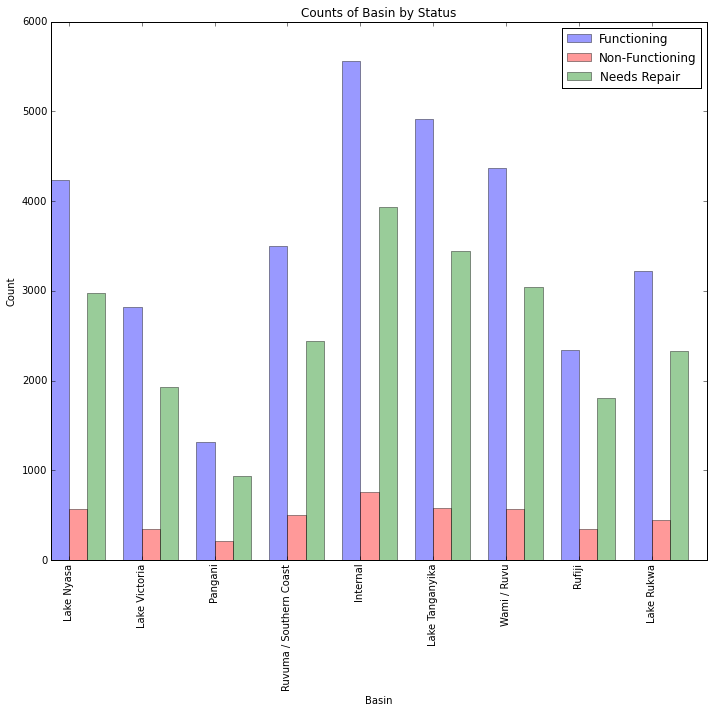

In [117]:
import numpy as np
import matplotlib.pyplot as plt


n_groups = 9

fig, ax = plt.subplots(figsize=(10,10))

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, x1, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Functioning')

rects2 = plt.bar(index + bar_width, x2, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Non-Functioning')

rects3 = plt.bar(index + bar_width*2, x3, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Needs Repair')


plt.xlabel('Basin')
plt.ylabel('Count')
plt.title('Counts of Basin by Status')
plt.xticks(index + bar_width, basin_codes,rotation='vertical')
plt.legend()

plt.tight_layout()
plt.show()

In [119]:
schm_functioning = df_complete_2.groupby(['label','scheme_management'])
x = schm_functioning.size()
schm_codes = df_complete_2['scheme_management'].unique()
print df_complete_2.scheme_management.unique()

['VWC' 'Other' None 'Private operator' 'WUG' 'Water Board' 'WUA'
 'Water authority' 'Company' 'Parastatal' 'Trust' 'SWC' 'None']


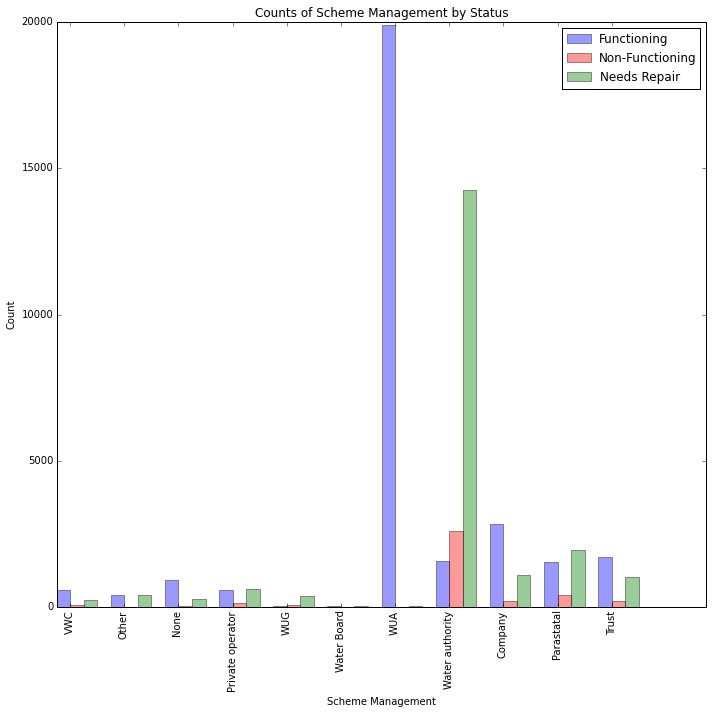

In [122]:
x1 = x[0:11]
x2 = x[11:22]
x3 = x[22:33]

n_groups = 11

fig, ax = plt.subplots(figsize=(10,10))

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4

rects1 = plt.bar(index, x1, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Functioning')

rects2 = plt.bar(index + bar_width, x2, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Non-Functioning')

rects3 = plt.bar(index + bar_width*2, x3, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Needs Repair')

plt.xlabel('Scheme Management')
plt.ylabel('Count')
plt.title('Counts of Scheme Management by Status')
plt.xticks(index + bar_width, schm_codes, rotation='vertical')
plt.legend()

plt.tight_layout()
plt.show()

In [123]:
etc_functioning = df_complete_2.groupby(['label','extraction_type_class'])
x = etc_functioning.size()
etc_codes = df_complete_2['extraction_type_class'].unique()
print df_complete_2.extraction_type_class.unique()
print x

['gravity' 'submersible' 'handpump' 'other' 'motorpump' 'wind-powered'
 'rope pump']
label                    extraction_type_class
functional               gravity                  14664
                         handpump                  9109
                         motorpump                 1594
                         other                     3300
                         rope pump                  248
                         submersible               3288
                         wind-powered                56
functional needs repair  gravity                   1969
                         handpump                  1149
                         motorpump                  198
                         other                      475
                         rope pump                   27
                         submersible                489
                         wind-powered                10
non functional           gravity                  10147
                         han

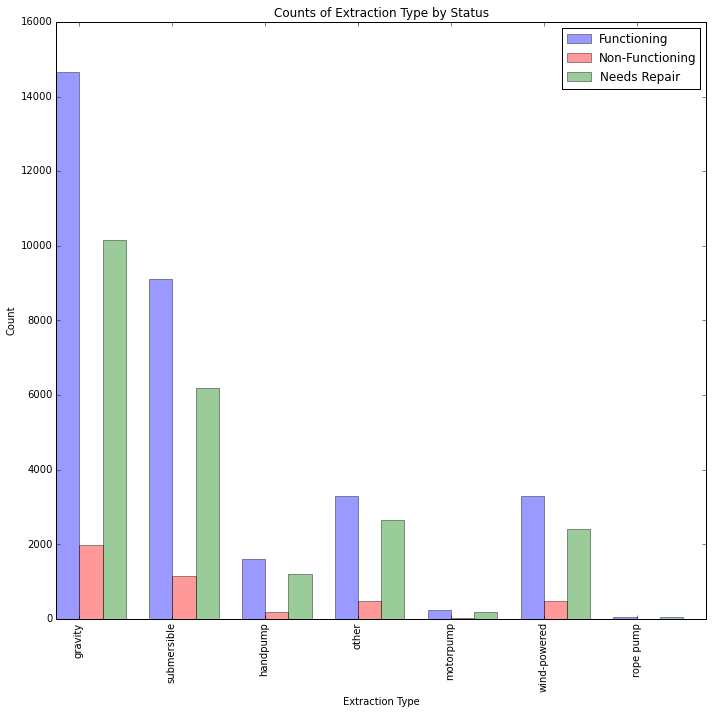

In [124]:
x1 = x[0:7]
x2 = x[7:14]
x3 = x[14:21]

n_groups = 7

fig, ax = plt.subplots(figsize=(10,10))

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4

rects1 = plt.bar(index, x1, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Functioning')

rects2 = plt.bar(index + bar_width, x2, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Non-Functioning')

rects3 = plt.bar(index + bar_width*2, x3, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Needs Repair')

plt.xlabel('Extraction Type')
plt.ylabel('Count')
plt.title('Counts of Extraction Type by Status')
plt.xticks(index + bar_width, etc_codes, rotation='vertical')
plt.legend()

plt.tight_layout()
plt.show()

In [125]:
mgg_functioning = df_complete_2.groupby(['label','management_group'])
x = mgg_functioning.size()
mgg_codes = df_complete_2['management_group'].unique()
print df_complete_2.management_group.unique()
print x

['user-group' 'other' 'commercial' 'parastatal' 'unknown']
label                    management_group
functional               commercial           1993
                         other                 509
                         parastatal            976
                         unknown               294
                         user-group          28487
functional needs repair  commercial            270
                         other                  68
                         parastatal            128
                         unknown                37
                         user-group           3814
non functional           commercial           1375
                         other                 366
                         parastatal            664
                         unknown               230
                         user-group          20189
dtype: int64


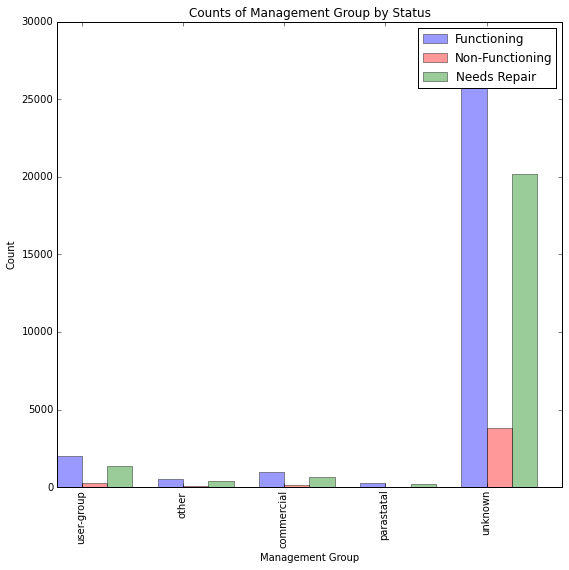

In [126]:
x1 = x[0:5]
x2 = x[5:10]
x3 = x[10:15]

n_groups = 5

fig, ax = plt.subplots(figsize=(8,8))

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4

rects1 = plt.bar(index, x1, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Functioning')

rects2 = plt.bar(index + bar_width, x2, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Non-Functioning')

rects3 = plt.bar(index + bar_width*2, x3, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Needs Repair')

plt.xlabel('Management Group')
plt.ylabel('Count')
plt.title('Counts of Management Group by Status')
plt.xticks(index + bar_width, mgg_codes,rotation='vertical')
plt.legend()

plt.tight_layout()
plt.show()

In [130]:
pay_functioning = df_complete_2.groupby(['label','payment'])
x = pay_functioning.size()
pay_codes = df_complete_2['payment'].unique()
print pay_codes
print x

['pay annually' 'never pay' 'pay per bucket' 'unknown'
 'pay when scheme fails' 'other' 'pay monthly']
label                    payment              
functional               never pay                13670
                         other                      578
                         pay annually              2013
                         pay monthly               4604
                         pay per bucket            4873
                         pay when scheme fails     2132
                         unknown                   4389
functional needs repair  never pay                 1868
                         other                       80
                         pay annually               259
                         pay monthly                610
                         pay per bucket             655
                         pay when scheme fails      275
                         unknown                    570
non functional           never pay                 9810
          

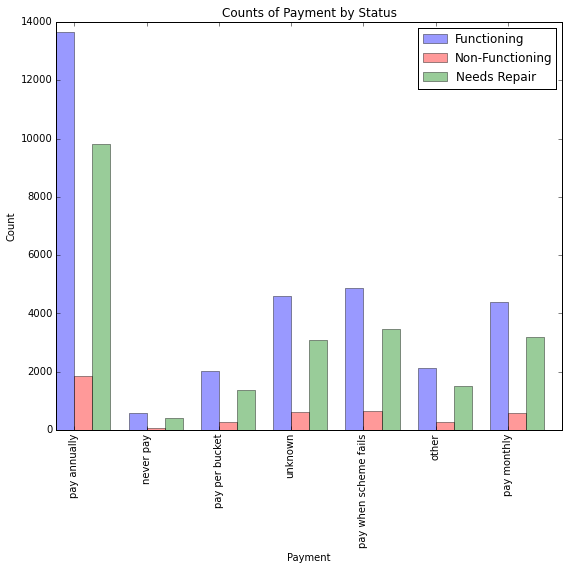

In [131]:
x1 = x[0:7]
x2 = x[7:14]
x3 = x[14:21]

n_groups = 7

fig, ax = plt.subplots(figsize=(8,8))

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4

rects1 = plt.bar(index, x1, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Functioning')

rects2 = plt.bar(index + bar_width, x2, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Non-Functioning')

rects3 = plt.bar(index + bar_width*2, x3, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Needs Repair')

plt.xlabel('Payment')
plt.ylabel('Count')
plt.title('Counts of Payment by Status')
plt.xticks(index + bar_width, pay_codes, rotation = 'vertical')
plt.legend()

plt.tight_layout()
plt.show()

In [132]:
wtq_functioning = df_complete_2.groupby(['label','water_quality'])
x = wtq_functioning.size()
wtq_codes = df_complete_2['water_quality'].unique()
print wtq_codes
print x

['soft' 'salty' 'milky' 'unknown' 'fluoride' 'coloured' 'salty abandoned'
 'fluoride abandoned']
label                    water_quality     
functional               coloured                275
                         fluoride                 99
                         fluoride abandoned       11
                         milky                   427
                         salty                  2569
                         salty abandoned         173
                         soft                  27762
                         unknown                 943
functional needs repair  coloured                 36
                         fluoride                 19
                         fluoride abandoned        1
                         milky                    63
                         salty                   329
                         salty abandoned          38
                         soft                   3683
                         unknown                 148
non functio

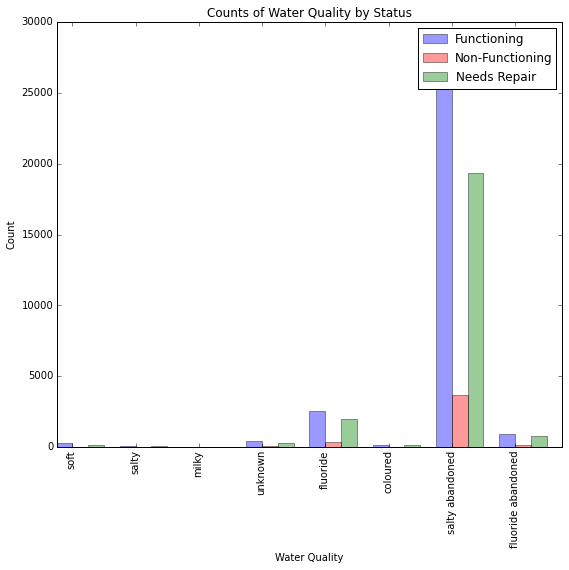

In [133]:
x1 = x[0:8]
x2 = x[8:16]
x3 = x[16:24]

n_groups = 8

fig, ax = plt.subplots(figsize=(8,8))

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4

rects1 = plt.bar(index, x1, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Functioning')

rects2 = plt.bar(index + bar_width, x2, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Non-Functioning')

rects3 = plt.bar(index + bar_width*2, x3, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Needs Repair')

plt.xlabel('Water Quality')
plt.ylabel('Count')
plt.title('Counts of Water Quality by Status')
plt.xticks(index + bar_width, wtq_codes, rotation='vertical')
plt.legend()

plt.tight_layout()
plt.show()

In [134]:
qty_functioning = df_complete_2.groupby(['label','quantity'])
x = qty_functioning.size()
qty_codes = df_complete_2['quantity'].unique()
print qty_codes
print x

['enough' 'insufficient' 'dry' 'seasonal' 'unknown']
label                    quantity    
functional               dry              3176
                         enough          18212
                         insufficient     8230
                         seasonal         2244
                         unknown           397
functional needs repair  dry               417
                         enough           2435
                         insufficient     1098
                         seasonal          314
                         unknown            53
non functional           dry              2653
                         enough          12539
                         insufficient     5801
                         seasonal         1492
                         unknown           339
dtype: int64


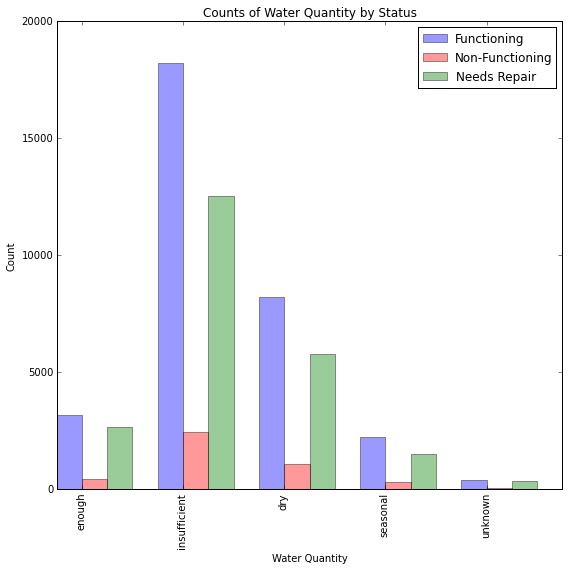

In [135]:
x1 = x[0:5]
x2 = x[5:10]
x3 = x[10:15]

n_groups = 5

fig, ax = plt.subplots(figsize=(8,8))

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4

rects1 = plt.bar(index, x1, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Functioning')

rects2 = plt.bar(index + bar_width, x2, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Non-Functioning')

rects3 = plt.bar(index + bar_width*2, x3, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Needs Repair')

plt.xlabel('Water Quantity')
plt.ylabel('Count')
plt.title('Counts of Water Quantity by Status')
plt.xticks(index + bar_width, qty_codes, rotation='vertical')
plt.legend()

plt.tight_layout()
plt.show()

In [136]:
src_functioning = df_complete_2.groupby(['label','source'])
x = src_functioning.size()
src_codes = df_complete_2['source'].unique()
print src_codes
print x

['spring' 'rainwater harvesting' 'dam' 'machine dbh' 'other' 'shallow well'
 'river' 'hand dtw' 'lake' 'unknown']
label                    source              
functional               dam                      339
                         hand dtw                 477
                         lake                     380
                         machine dbh             5946
                         other                    120
                         rainwater harvesting    1230
                         river                   5171
                         shallow well            9167
                         spring                  9397
                         unknown                   32
functional needs repair  dam                       39
                         hand dtw                  67
                         lake                      63
                         machine dbh              822
                         other                     20
                         rainw

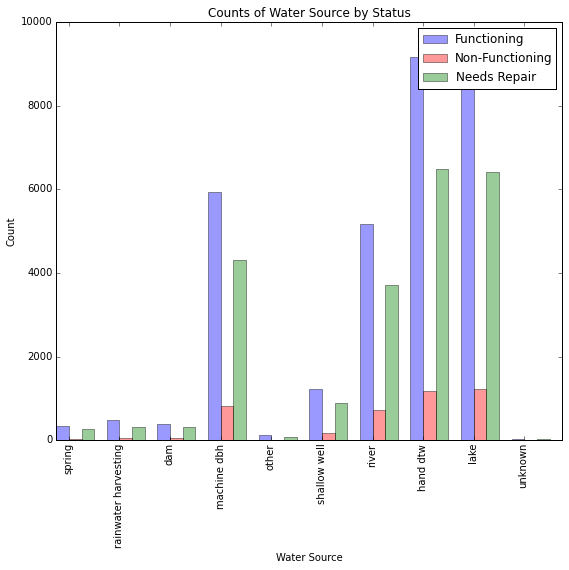

In [137]:
x1 = x[0:10]
x2 = x[10:20]
x3 = x[20:30]

n_groups = 10

fig, ax = plt.subplots(figsize=(8,8))

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4

rects1 = plt.bar(index, x1, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Functioning')

rects2 = plt.bar(index + bar_width, x2, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Non-Functioning')

rects3 = plt.bar(index + bar_width*2, x3, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Needs Repair')

plt.xlabel('Water Source')
plt.ylabel('Count')
plt.title('Counts of Water Source by Status')
plt.xticks(index + bar_width, src_codes, rotation='vertical')
plt.legend()

plt.tight_layout()
plt.show()

In [138]:
srcl_functioning = df_complete_2.groupby(['label','source_class'])
x = srcl_functioning.size()
srcl_codes = df_complete_2['source_class'].unique()
print srcl_codes
print x


['groundwater' 'surface' 'unknown']
label                    source_class
functional               groundwater     24987
                         surface          7120
                         unknown           152
functional needs repair  groundwater      3283
                         surface          1012
                         unknown            22
non functional           groundwater     17524
                         surface          5196
                         unknown           104
dtype: int64


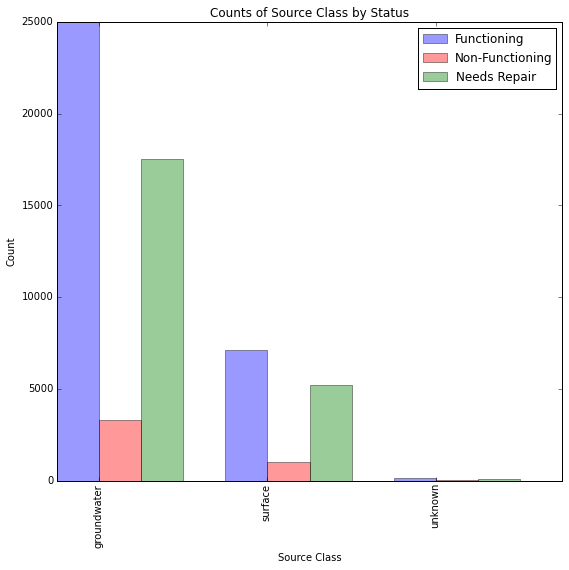

In [139]:
x1 = x[0:3]
x2 = x[3:6]
x3 = x[6:9]

n_groups = 3

fig, ax = plt.subplots(figsize=(8,8))

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4

rects1 = plt.bar(index, x1, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Functioning')

rects2 = plt.bar(index + bar_width, x2, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Non-Functioning')

rects3 = plt.bar(index + bar_width*2, x3, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Needs Repair')

plt.xlabel('Source Class')
plt.ylabel('Count')
plt.title('Counts of Source Class by Status')
plt.xticks(index + bar_width, srcl_codes, rotation='vertical')
plt.legend()

plt.tight_layout()
plt.show()

In [182]:
wtp_functioning = df_complete_2.groupby(['label','waterpoint_type'],squeeze=True)
x = wtp_functioning.size()
wtp_codes = df_complete_2['waterpoint_type'].unique()
print wtp_codes
print x

['communal standpipe' 'communal standpipe multiple' 'hand pump' 'other'
 'improved spring' 'cattle trough' 'dam']
label                    waterpoint_type            
functional               cattle trough                     75
                         communal standpipe             15556
                         communal standpipe multiple     3213
                         dam                                4
                         hand pump                       9647
                         improved spring                  466
                         other                           3298
functional needs repair  cattle trough                      5
                         communal standpipe              2104
                         communal standpipe multiple      468
                         hand pump                       1203
                         improved spring                   61
                         other                            476
non functional           ca

In [186]:
print x

xyz = pd.Series( 0, index =[('functional needs repair','dam')])

xyzx = pd.concat([x,xyz])

print xyzx.combine()

xyzx.reindex()
print xyzx

x1 = x[0:7]
x2 = x[7:13]
x3 = x[13:20]

print type(x1)
print type(x2)
print type(x3)

n_groups = 7

fig, ax = plt.subplots(figsize=(8,8))

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4

rects1 = plt.bar(index, x1, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Functioning')

rects2 = plt.bar(index + bar_width, x2, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Non-Functioning')

rects3 = plt.bar(index + bar_width*2, x3, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Needs Repair')

plt.xlabel('Waterpoint Type')
plt.ylabel('Count')
plt.title('Counts of Water Point Type by Status')
plt.xticks(index + bar_width,wtp_codes,rotation='vertical')
plt.legend()

plt.tight_layout()
plt.show()

label                    waterpoint_type            
functional               cattle trough                     75
                         communal standpipe             15556
                         communal standpipe multiple     3213
                         dam                                4
                         hand pump                       9647
                         improved spring                  466
                         other                           3298
functional needs repair  cattle trough                      5
                         communal standpipe              2104
                         communal standpipe multiple      468
                         hand pump                       1203
                         improved spring                   61
                         other                            476
non functional           cattle trough                     36
                         communal standpipe             10862
                 

TypeError: 'MultiIndex' object is not callable

## 

In [16]:
qty_functioning = df_complete_2.groupby(['label','region_code'])
x = qty_functioning.size()
qty_codes = df_data_2['region_code'].unique()
print qty_codes
print x

[14 11  1  3 60 17 18  4  2 19 10 99 16  7  5 12 90 24 20 80  9 13  6 15 21
  8 40]
label                    region_code
functional               1              1149
                         2              1666
                         3              2413
                         4              1388
                         5              2163
                         6               896
                         7               439
                         8               144
                         9               203
                         10             1440
                         11             2949
                         12             2502
                         13             1138
                         14             1074
                         15              980
                         16             1495
                         17             2750
                         18             1839
                         19             1627
                        

//anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


AssertionError: incompatible sizes: argument 'height' must be length 27 or scalar

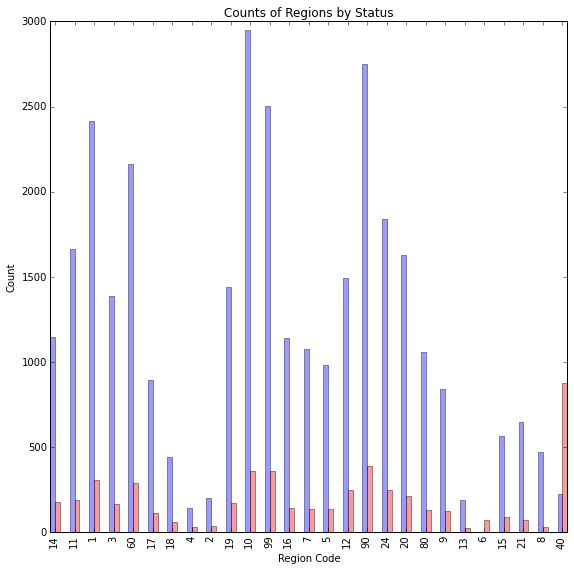

In [22]:
x1 = x[0:27]
x2 = x[27:54]
x3 = x[54:81]

n_groups = 27

fig, ax = plt.subplots(figsize=(8,8))

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4

plt.xlabel('Region Code')
plt.ylabel('Count')
plt.title('Counts of Regions by Status')
plt.xticks(index + bar_width, qty_codes, rotation='vertical')
plt.legend()

plt.tight_layout()
rects1 = plt.bar(index, x1, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Functioning')

rects2 = plt.bar(index + bar_width, x2, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Non-Functioning')

rects3 = plt.bar(index + bar_width*2, x3, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Needs Repair')

plt.xlabel('Region Code')
plt.ylabel('Count')
plt.title('Counts of Regions by Status')
plt.xticks(index + bar_width, srcl_codes, rotation='vertical')
plt.legend()

plt.tight_layout()
plt.show()